# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [ ]:
# import libraries here

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [ ]:
# your code here

#### Print `temp`.

In [ ]:
# your code here

#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### Select the rows where state is New York.

In [ ]:
# your code here

#### What is the average temperature of cities in New York?

In [ ]:
# your code here

#### Which states and cities have a temperature above 15 degrees Celsius?

In [ ]:
# your code here

#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [ ]:
# your code here

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [ ]:
# your code here

#### Find the mean and standard deviation of the temperature of each state.

In [ ]:
# your code here

# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [ ]:
# your code here

#### Explore the data types of the `employees` dataframe. Comment your results.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What's the average salary in this company?

In [ ]:
# your code here

#### What's the highest salary?

In [ ]:
# your code here

#### What's the lowest salary?

In [ ]:
# your code here

#### Who are the employees with the lowest salary?

In [ ]:
# your code here

#### Find all the information about an employee called David.

In [ ]:
# your code here

#### Could you return only David's salary?

In [ ]:
# your code here

#### Print all the rows where job title is associate.

In [ ]:
# your code here

#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [ ]:
# Method 1
# your code here

In [ ]:
# Method 2
# your code here

#### Find the employees whose title is associate and whose salary is above 55.

In [ ]:
# your code here

#### Group the employees by number of years of employment. What are the average salaries in each group?

In [ ]:
# your code here

####  What is the average salary per title?

In [ ]:
# your code here

####  Find the salary quartiles.


In [ ]:
# your code here

#### Is the mean salary different per gender?

In [ ]:
# your code here

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [ ]:
# your code here

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [ ]:
# your code here

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [5]:
# your code here
import pandas as pd
data= pd.read_csv("C:\\Users\\Zoe Mercury\\Documents\\GitHub\\Week4\\lab-subsetting-and-descriptive-stats\\your-code\\Orders.csv")
data.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [3]:
# your code here
data.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [ ]:
"""
your comments here
"""

####  What is the average purchase price?

In [5]:
# your code here
data['UnitPrice'].mean()

3.116174480549152

#### What are the highest and lowest purchase prices? 

In [6]:
# your code here
data['UnitPrice'].max()

8142.75

In [7]:
data['UnitPrice'].min()

0.0

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [54]:
# your code here
spain=data.pivot_table(index=['Country',"CustomerID"])
spain=spain.loc['Spain']
spain

,InvoiceNo,Quantity,UnitPrice,Unnamed: 0,amount_spent,day,hour,month,year
CustomerID,,,,,,,,,
12354,550911.000000,9.137931,4.503793,166295.500000,18.610345,4.000000,13.000000,4.000000,2011.000000
12417,551398.000000,11.608696,3.132609,171232.000000,18.969565,4.000000,13.000000,4.000000,2011.000000
12421,559281.933333,10.755556,4.520222,262510.622222,17.934222,3.955556,11.955556,6.266667,2011.000000
12442,580955.000000,15.166667,3.340000,531425.500000,14.338333,2.000000,14.000000,12.000000,2011.000000
12445,577125.000000,15.500000,7.987500,478970.500000,33.350000,4.000000,18.000000,11.000000,2011.000000
12448,572886.000000,11.045455,5.951818,420313.500000,20.429545,3.000000,13.000000,10.000000,2011.000000
12450,557764.250000,16.000000,1.617500,237307.750000,24.735000,6.000000,14.000000,6.250000,2011.000000
12454,571255.000000,67.066667,7.282000,398633.000000,235.222667,5.000000,17.000000,10.000000,2011.000000
12455,562199.083333,11.791667,3.692500,289392.520833,15.999167,3.250000,13.041667,7.625000,2011.000000


#### How many customers do we have in Spain?

In [55]:
# your code here
spain=data.pivot_table(index=['Country'], aggfunc={'CustomerID':'count'})
spain.loc['Spain']

CustomerID    2485
Name: Spain, dtype: int64

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [10]:
# your code here
items_bought=data.pivot_table(index=['CustomerID'], aggfunc={'Quantity':'sum'})

condition= items_bought['Quantity']>= 50
items_bought=items_bought[condition]
len(items_bought)

4098

#### Select orders from Spain that include more than 50 items.

In [11]:
items_bought

,Quantity
CustomerID,
12346,74215
12347,2458
12348,2341
12349,631
12350,197
...,...
18278,66
18281,54
18282,103


In [15]:
# your code here
items_spain=data.pivot_table(index=['Country','CustomerID'], aggfunc={'Quantity':'sum'})
items_spain
condition= items_spain['Quantity']>= 50
items_spain=items_spain[condition]
items_spain.loc['Spain']

,Quantity
CustomerID,
12354,530
12417,267
12421,484
12442,182
12445,62
12448,243
12450,128
12454,1006
12455,566


#### Select all free orders.

In [35]:
# your code here
condition1= data['amount_spent'] == 0
data[condition1]['amount_spent']

6914      0.0
22539     0.0
25379     0.0
29080     0.0
29082     0.0
34494     0.0
53788     0.0
85671     0.0
92875     0.0
97430     0.0
107192    0.0
128641    0.0
137127    0.0
194648    0.0
197173    0.0
199711    0.0
208950    0.0
223931    0.0
223932    0.0
223933    0.0
223934    0.0
256263    0.0
259399    0.0
273926    0.0
286507    0.0
307092    0.0
319882    0.0
320049    0.0
320407    0.0
322279    0.0
328385    0.0
329006    0.0
329007    0.0
334242    0.0
334243    0.0
352746    0.0
353097    0.0
354170    0.0
358629    0.0
370473    0.0
Name: amount_spent, dtype: float64

#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [3]:
def lunchbag(x):
    return x.startswith('lunch bag')

In [9]:
data[data['Description'].apply(lunchbag)]


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


In [ ]:
data[data['Description'].str.startswith('lunch bag')]

In [11]:
data[data['Description'].str[:9]=="lunch bag"]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all `lunch bag` orders made in 2011.

In [12]:
# your code here
data[(data['Description'].str.startswith('lunch bag')) & (data['year']==2011)]


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

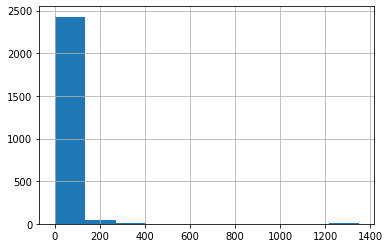

In [61]:
# your code here
condition = data['Country'] == 'Spain'
data[condition]['amount_spent'].hist()

#### Select all orders made in the month of August.

In [69]:
# your code here
condition= data['month']==8
august=data[condition]
august

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [72]:
# your code here
august.groupby(['Country'])['InvoiceNo'].count()

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: InvoiceNo, dtype: int64

#### What's the  average amount of money spent by country?

In [73]:
# your code here
data.pivot_table(index=['Country'], values= ['amount_spent'], aggfunc=['mean'])

,mean
,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169


#### What's the most expensive item?

In [41]:
# your code here
data['UnitPrice'].max()

8142.75

#### What is the average amount spent per year?

In [62]:
# your code here
amount_year=data.pivot_table(index=['year'], aggfunc={'amount_spent':'mean'})

In [63]:
amount_year

,amount_spent
year,
2010,21.892733
2011,22.430074
